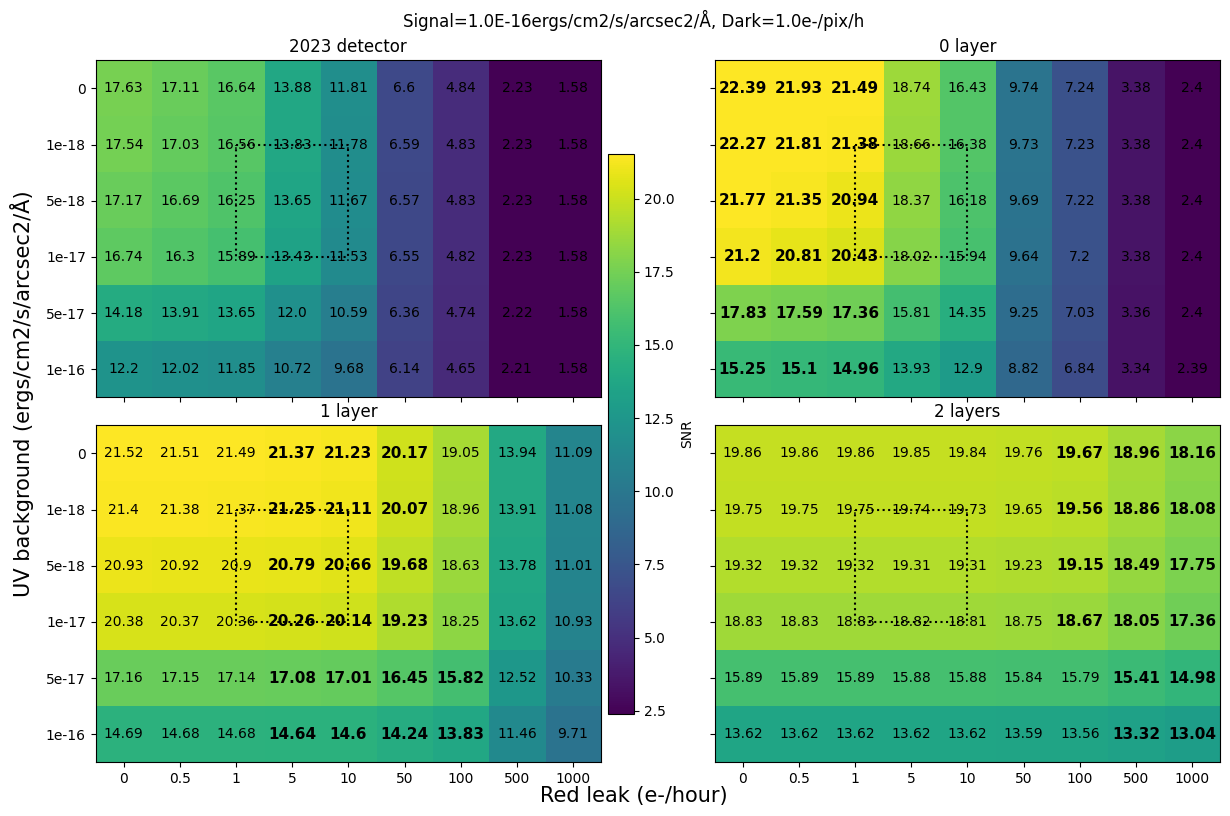

In [1]:

from Observation import *
from matplotlib.colors import LogNorm




skys = [0,1e-18,5e-18, 1e-17,5e-17, 1e-16]
# skys = [1e-18,1e-17,1e-16]
extras = [0.5,2,7,22]
extras = [0,0.5,1,5,10,50,100,500,1000]#,100,500]

no = np.zeros((len(extras),len(skys))).T
l0 = np.zeros((len(extras),len(skys))).T
l1 = np.zeros((len(extras),len(skys))).T
l2 = np.zeros((len(extras),len(skys))).T


# sys.path.append("/Users/Vincent/Github/fireball2-etc")
# sys.path.append("/Users/Vincent/Github/fireball2-etc/notebooks")
# sys.path.append("/Users/Vincent/Github/fireball2-etc/notebooks/interpolate")

skyms = [skys.index(1e-18),skys.index(1e-17)]
leaks = [extras.index(1),extras.index(10)]
Dark=1
Signal=1e-16
counting_mode=True
# for Signal in [1e-17,1e-16,1e-15][:3]:
for Dark in [1,5,10][:1]:
    for j, sky in enumerate(skys):
        for i, extra in enumerate(extras):
            no[j,i] = np.unique(Observation(Signal=Signal,Sky=sky, Dard_current=Dark,extra_background=extra, QE=0.48,i=20,counting_mode=counting_mode).snrs)
            l0[j,i] = np.unique(Observation(Signal=Signal,Sky=sky, Dard_current=Dark, extra_background=extra, QE=0.73,i=20,counting_mode=counting_mode).snrs)
            l1[j,i] = np.unique(Observation(Signal=Signal,Sky=sky,  Dard_current=Dark, extra_background=extra/33, QE=0.68,i=20,counting_mode=counting_mode).snrs)
            l2[j,i] = np.unique(Observation(Signal=Signal,Sky=sky,  Dard_current=Dark, extra_background=extra/33/16, QE=0.59,i=20,counting_mode=counting_mode).snrs)

    fig, axes = plt.subplots(2,2,sharex=True, sharey=True,figsize=(13,8))
    fig.subplots_adjust(right=0.8)
    for ax, a,n in zip(axes.flatten(), [no,l0,l1,l2],["2023 detector","0 layer","1 layer","2 layers"]) :
        im = ax.imshow(a, vmin=np.min(l0), vmax=np.max(l1))
        for (j,i),label in np.ndenumerate(a):
            if label==np.max([no[j,i],l0[j,i],l1[j,i],l2[j,i]]):
                ax.text(i,j,np.round(label,2),ha='center',va='center', weight='bold',fontsize=11)
            else:
                ax.text(i,j,np.round(label,2),ha='center',va='center')
        ax.plot([leaks[0],leaks[1],leaks[1],leaks[0],leaks[0]],[skyms[0],skyms[0],skyms[1],skyms[1],skyms[0]],":k")
        ax.set_title(n)
        ax.set_xticklabels([0] + extras)
        ax.set_yticklabels([0] + skys)
    cbar_ax = fig.add_axes([0.48, 0.1, 0.02, 0.7])
    fig.suptitle("Signal=%0.1Eergs/cm2/s/arcsec2/Å, Dark=%0.1fe-/pix/h"%(Signal,Dark))
    fig.colorbar(im, cax=cbar_ax,label="SNR")
    fig.tight_layout()
    fig.text(0.5, -0.01,'Red leak (e-/hour)', ha='center',fontsize=15)
    fig.text(0.02, 0.5, 'UV background (ergs/cm2/s/arcsec2/Å)', va='center', rotation='vertical',fontsize=15)

    plt.show()

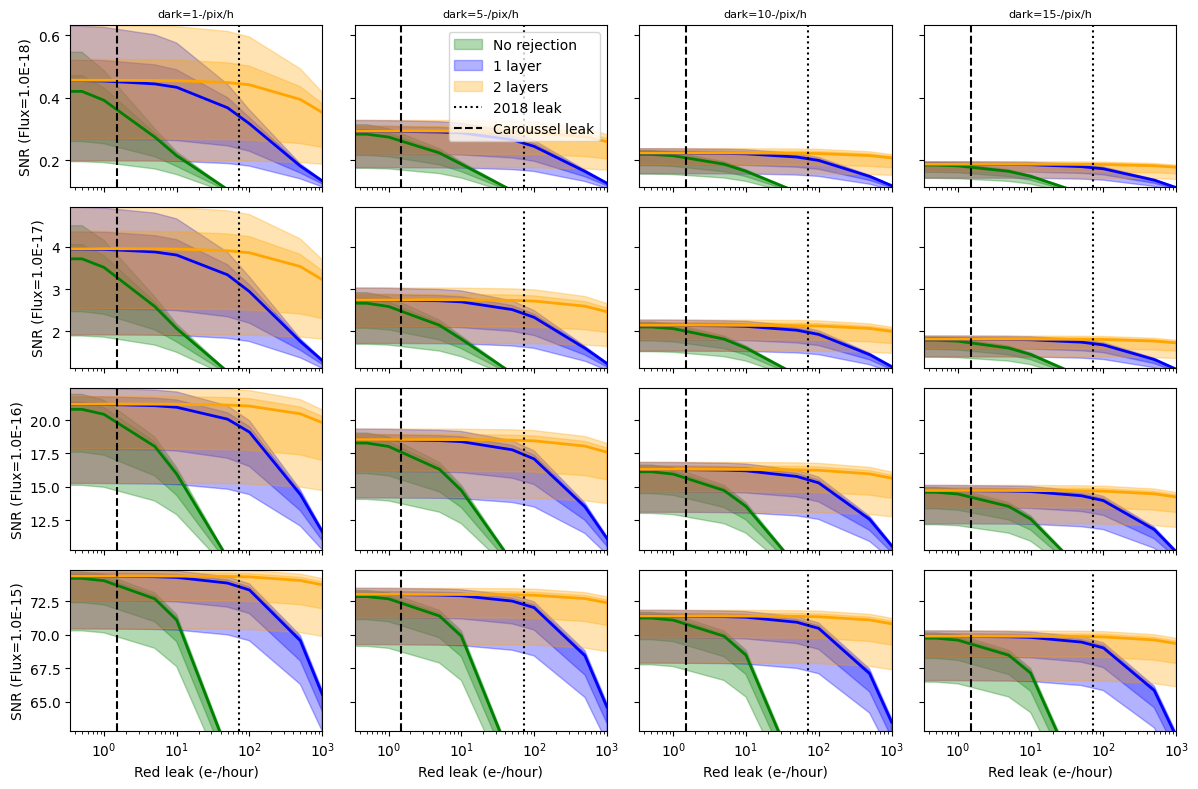

In [2]:


estimator = "snrs"
# estimator = "time2reach_n_sigma_SNR"
Signals = [1e-18,1e-17,1e-16,1e-15]
Darks = [1,5,10,15]
fig, axes = plt.subplots(len(Signals),len(Darks),sharex=True,figsize=(12,8),sharey="row")
for n, Signal in enumerate(Signals):
    for m, Dark in enumerate(Darks):
        for j, sky in enumerate(skys):
            for i, extra in enumerate(extras):
                no[j,i] = np.unique(getattr(Observation(Signal=Signal,Sky=sky, Dard_current=Dark,extra_background=extra, QE=0.48,i=20,counting_mode=counting_mode),estimator))
                # l0[j,i] = np.unique(getattr(Observation(Signal=Signal,Sky=sky, Dard_current=Dark, extra_background=extra, QE=0.73,i=20,counting_mode=counting_mode),estimator))
                # l1[j,i] = np.unique(getattr(Observation(Signal=Signal,Sky=sky,  Dard_current=Dark, extra_background=extra/33, QE=0.68,i=20,counting_mode=counting_mode),estimator))
                # l2[j,i] = np.unique(getattr(Observation(Signal=Signal,Sky=sky,  Dard_current=Dark, extra_background=extra/33/16, QE=0.59,i=20,counting_mode=counting_mode),estimator))
                l0[j,i] = np.unique(getattr(Observation(Signal=Signal,Sky=sky, Dard_current=Dark, extra_background=extra, QE=0.73,i=20,counting_mode=counting_mode),estimator))
                l1[j,i] = np.unique(getattr(Observation(Signal=Signal,Sky=sky,  Dard_current=Dark, extra_background=extra/33, QE=0.73,i=20,counting_mode=counting_mode),estimator))
                l2[j,i] = np.unique(getattr(Observation(Signal=Signal,Sky=sky,  Dard_current=Dark, extra_background=extra/33/16, QE=0.73,i=20,counting_mode=counting_mode),estimator))


        axes[n,m].fill_between(extras,l0[0,:],l0[-1,:],alpha=0.3,color="green",label="No rejection",interpolate=True)
        axes[n,m].fill_between(extras,l0[2,:],l0[-2,:],alpha=0.3,color="green",interpolate=True)
        axes[n,m].plot(extras,l0[3,:],color="green",lw=2)
        axes[n,m].fill_between(extras,l1[0,:],l1[-1,:],alpha=0.3,color="blue",label="1 layer",interpolate=True)
        axes[n,m].fill_between(extras,l1[2,:],l1[-2,:],alpha=0.3,color="blue",interpolate=True)
        axes[n,m].plot(extras,l1[3,:],color="blue",lw=2)
        axes[n,m].fill_between(extras,l2[0,:],l2[-1,:],alpha=0.3,color="orange",interpolate=True,label="2 layers")
        axes[n,m].fill_between(extras,l2[2,:],l2[-2,:],alpha=0.3,color="orange",interpolate=True)
        axes[n,m].plot(extras,l2[3,:],color="orange",lw=2)
        axes[n,m].axvline(72,ls=":",c="k",label="2018 leak")
        axes[n,m].axvline(1.5,ls="--",c="k",label="Caroussel leak")
            # plt.yscale("log")
        if estimator == "time2reach_n_sigma_SNR":
            axes[n,0].set_ylabel("H for 5σ detect (F=%0.0E)"%(Signal))
        else:
            # axes[n,-1].twinx().set_ylabel("SNR (Flux=%0.1E)"%(Signal))
            axes[n,0].set_ylabel("SNR (Flux=%0.1E)"%(Signal))

        axes[-1,m].set_xlabel("Red leak (e-/hour)")
        axes[0,m].set_title("dark=%i-/pix/h"%(Dark),fontsize=8)
        if m==0:
            axes[n,0].set_ylim((np.min(l1),np.max(l0)))
            if estimator == "time2reach_n_sigma_SNR":
                axes[n,0].set_yscale("log")
                axes[n,0].set_ylim((np.min(l0),np.max(l1)))
axes[0,0].set_xscale("log")
axes[0,1].legend(fontsize=10)
axes[0,0].set_xlim((np.min(extras),np.max(extras)))
fig.tight_layout()
plt.show()
# plt.fill_between()

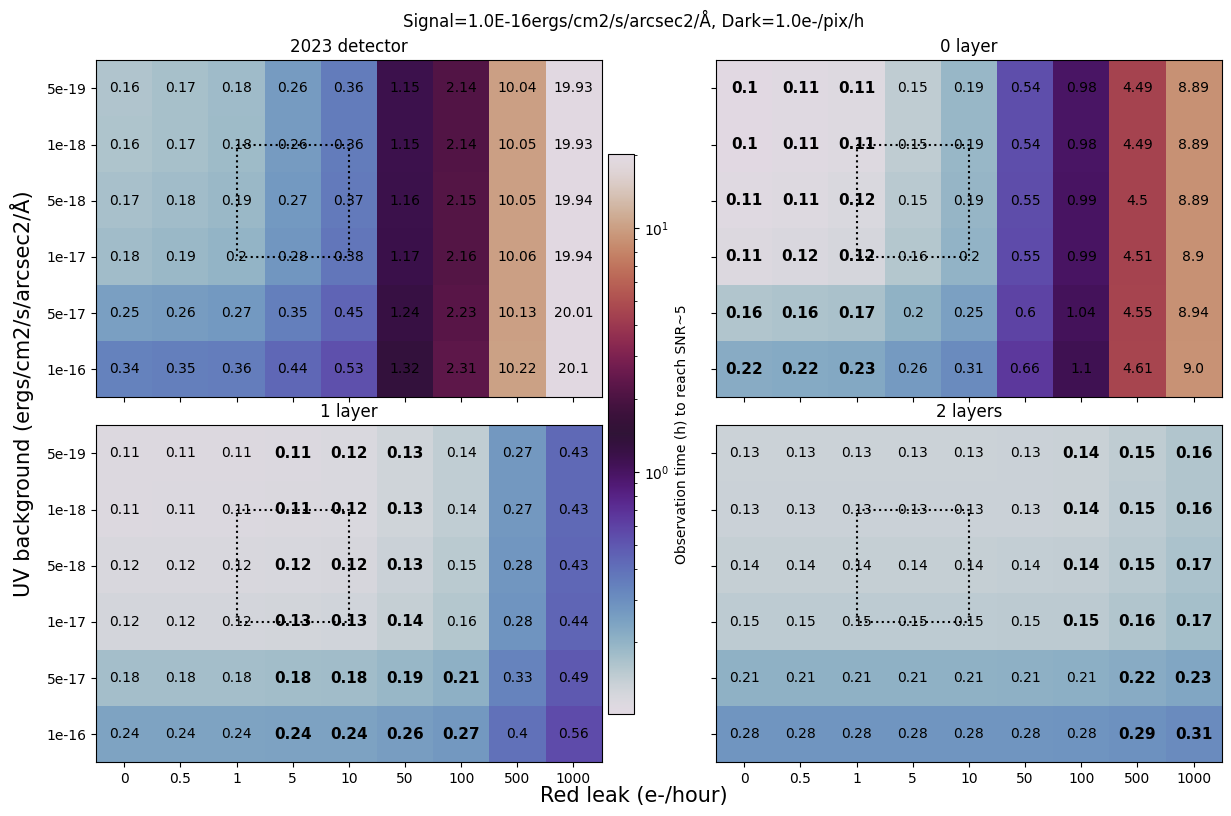

In [3]:

from Observation import *




skys = [5e-19,1e-18,5e-18, 1e-17,5e-17, 1e-16]
# skys = [1e-18,1e-17,1e-16]
extras = [0.5,2,7,22]
extras = [0,0.5,1,5,10,50,100,500,1000]#,100,500]

no = np.zeros((len(extras),len(skys))).T
l0 = np.zeros((len(extras),len(skys))).T
l1 = np.zeros((len(extras),len(skys))).T
l2 = np.zeros((len(extras),len(skys))).T


# sys.path.append("/Users/Vincent/Github/fireball2-etc")
# sys.path.append("/Users/Vincent/Github/fireball2-etc/notebooks")
# sys.path.append("/Users/Vincent/Github/fireball2-etc/notebooks/interpolate")

skyms = [skys.index(1e-18),skys.index(1e-17)]
leaks = [extras.index(1),extras.index(10)]
Dark=1
Signal=1e-16
counting_mode=True
acquisition_time = 5
# for Signal in [1e-17,1e-16,1e-15][:3]:
for Dark in [1,5,10][:1]:
    for j, sky in enumerate(skys):
        for i, extra in enumerate(extras):
            no[j,i] = np.unique(Observation(Signal=Signal,Sky=sky, acquisition_time=1,Dard_current=Dark,extra_background=extra, QE=0.48,i=20,counting_mode=counting_mode).time2reach_n_sigma_SNR)
            l0[j,i] = np.unique(Observation(Signal=Signal,Sky=sky, acquisition_time=1,Dard_current=Dark, extra_background=extra, QE=0.72,i=20,counting_mode=counting_mode).time2reach_n_sigma_SNR)
            l1[j,i] = np.unique(Observation(Signal=Signal,Sky=sky,  acquisition_time=1,Dard_current=Dark, extra_background=extra/33, QE=0.66,i=20,counting_mode=counting_mode).time2reach_n_sigma_SNR)
            l2[j,i] = np.unique(Observation(Signal=Signal,Sky=sky,  acquisition_time=1,Dard_current=Dark, extra_background=extra/33/16, QE=0.57,i=20,counting_mode=counting_mode).time2reach_n_sigma_SNR)

    fig, axes = plt.subplots(2,2,sharex=True, sharey=True,figsize=(13,8))
    fig.subplots_adjust(right=0.8)
    for ax, a,n in zip(axes.flatten(), [no,l0,l1,l2],["2023 detector","0 layer","1 layer","2 layers"]) :
        im = ax.imshow(a, norm=LogNorm(vmin=np.min([no,l0,l1,l2]), vmax=np.max([no,l0,l1,l2])),cmap='twilight' )
        for (j,i),label in np.ndenumerate(a):
            if label==np.min([no[j,i],l0[j,i],l1[j,i],l2[j,i]]):
                ax.text(i,j,np.round(label,2),ha='center',va='center', weight='bold',fontsize=11)
            else:
                ax.text(i,j,np.round(label,2),ha='center',va='center')
        ax.plot([leaks[0],leaks[1],leaks[1],leaks[0],leaks[0]],[skyms[0],skyms[0],skyms[1],skyms[1],skyms[0]],":k")
        ax.set_title(n)
        ax.set_xticklabels([0] + extras)
        ax.set_yticklabels([0] + skys)
    cbar_ax = fig.add_axes([0.48, 0.1, 0.02, 0.7])
    fig.suptitle("Signal=%0.1Eergs/cm2/s/arcsec2/Å, Dark=%0.1fe-/pix/h"%(Signal,Dark))
    fig.colorbar(im, cax=cbar_ax,label="Observation time (h) to reach SNR~5")
    fig.tight_layout()
    fig.text(0.5, -0.01,'Red leak (e-/hour)', ha='center',fontsize=15)
    fig.text(0.02, 0.5, 'UV background (ergs/cm2/s/arcsec2/Å)', va='center', rotation='vertical',fontsize=15)

    plt.show()

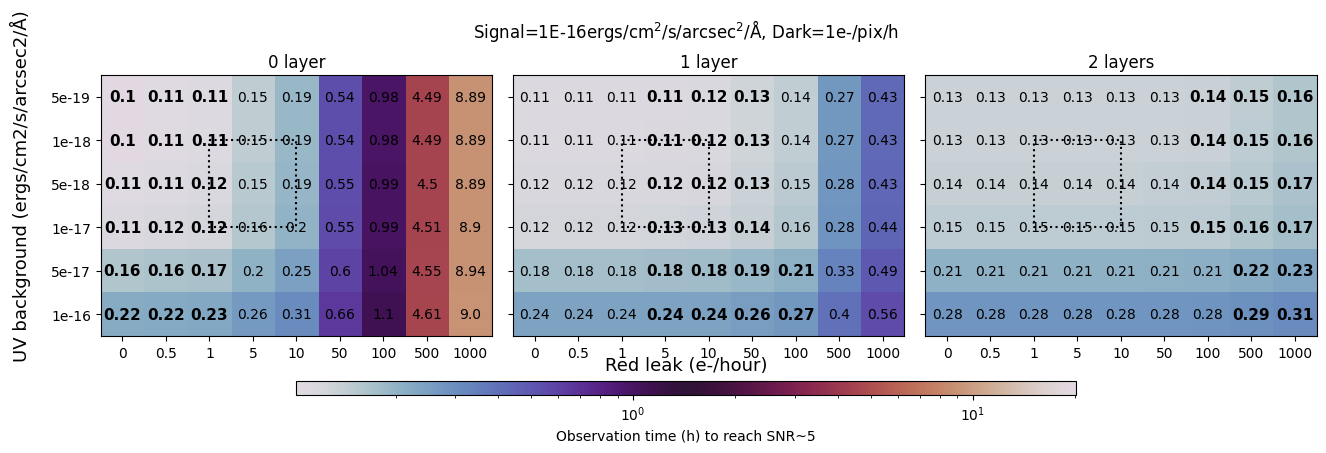

In [13]:

from Observation import *
from matplotlib.colors import LogNorm

skys = [5e-19,1e-18,5e-18, 1e-17,5e-17, 1e-16]
# skys = [1e-18,1e-17,1e-16]
extras = [0.5,2,7,22]
extras = [0,0.5,1,5,10,50,100,500,1000]#,100,500]

no = np.zeros((len(extras),len(skys))).T
l0 = np.zeros((len(extras),len(skys))).T
l1 = np.zeros((len(extras),len(skys))).T
l2 = np.zeros((len(extras),len(skys))).T


# sys.path.append("/Users/Vincent/Github/fireball2-etc")
# sys.path.append("/Users/Vincent/Github/fireball2-etc/notebooks")
# sys.path.append("/Users/Vincent/Github/fireball2-etc/notebooks/interpolate")

skyms = [skys.index(1e-18),skys.index(1e-17)]
leaks = [extras.index(1),extras.index(10)]
Dark=1
Signal=1e-16
counting_mode=True
acquisition_time = 5
# for Signal in [1e-17,1e-16,1e-15][:3]:
for Dark in [1,5,10][:1]:
    for j, sky in enumerate(skys):
        for i, extra in enumerate(extras):
            no[j,i] = np.unique(Observation(Signal=Signal,Sky=sky, acquisition_time=1,Dard_current=Dark,extra_background=extra, QE=0.48,i=20,counting_mode=counting_mode).time2reach_n_sigma_SNR)
            l0[j,i] = np.unique(Observation(Signal=Signal,Sky=sky, acquisition_time=1,Dard_current=Dark, extra_background=extra, QE=0.72,i=20,counting_mode=counting_mode).time2reach_n_sigma_SNR)
            l1[j,i] = np.unique(Observation(Signal=Signal,Sky=sky,  acquisition_time=1,Dard_current=Dark, extra_background=extra/33, QE=0.66,i=20,counting_mode=counting_mode).time2reach_n_sigma_SNR)
            l2[j,i] = np.unique(Observation(Signal=Signal,Sky=sky,  acquisition_time=1,Dard_current=Dark, extra_background=extra/33/16, QE=0.57,i=20,counting_mode=counting_mode).time2reach_n_sigma_SNR)

    fig, axes = plt.subplots(1,3,sharex=True, sharey=True,figsize=(13,3.5))
    fig.subplots_adjust(right=0.8)
    for ax, a,n in zip(axes.flatten(), [l0,l1,l2],["0 layer","1 layer","2 layers"]) :
        im = ax.imshow(a, norm=LogNorm(vmin=np.min([no,l0,l1,l2]), vmax=np.max([no,l0,l1,l2])),cmap='twilight' )
        for (j,i),label in np.ndenumerate(a):
            if label==np.min([no[j,i],l0[j,i],l1[j,i],l2[j,i]]):
                ax.text(i,j,np.round(label,2),ha='center',va='center', weight='bold',fontsize=11)
            else:
                ax.text(i,j,np.round(label,2),ha='center',va='center')
        ax.plot([leaks[0],leaks[1],leaks[1],leaks[0],leaks[0]],[skyms[0],skyms[0],skyms[1],skyms[1],skyms[0]],":k")
        ax.set_title(n)
        ax.set_xticklabels([0] + extras)
        ax.set_yticklabels([0] + skys)
    cbar_ax = fig.add_axes([0.2, -0.1, 0.6, 0.04])
    fig.suptitle(r"Signal=%0.0Eergs/cm$^2$/s/arcsec$^2$/Å, Dark=%ie-/pix/h"%(Signal,Dark))
    fig.colorbar(im, cax=cbar_ax,label="Observation time (h) to reach SNR~5",orientation="horizontal")
    fig.tight_layout()
    fig.text(0.5, -0.03,'Red leak (e-/hour)', ha='center',fontsize=13)
    fig.text(-0.02, 0.5, 'UV background (ergs/cm2/s/arcsec2/Å)', va='center', rotation='vertical',fontsize=13)

    plt.show()